Goal of this notebook is to convert the images to YOLO format <br>
Goal Conver the YOLO Format back to the original bounding box start positions

The positions Required for YOLO v8 Format in the .txt file is the following

1. The first number is the class ID.
2. The next four numbers are normalized coordinates for the bounding box:
3. Center X
4. Center Y
5. Width
6. Height

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(2316, 904, 3)


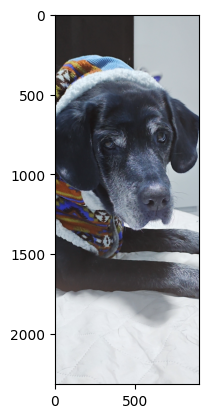

In [ ]:

## Read the image in, get the shape of the image, transform to RGB, plot the image
fs='shanti/Screenshot_20250127_114519_Gallery.jpg'
img = cv2.imread(fs, 1)
print(img.shape)
plt.imshow(img)

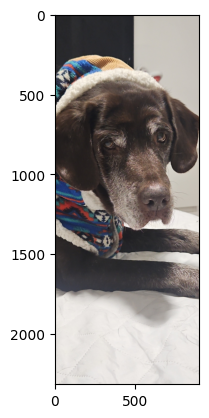

In [ ]:
### Convert to RGB
img_transform=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_transform)

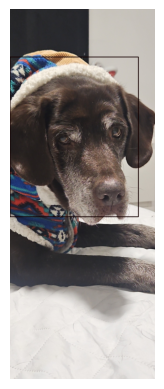

In [7]:
height, width, _ = img.shape
# Bounding box in pixels
# in my image draw the object in this position
x_start = 0
x_end = 800
y_start = 300
y_end = 1300
cv2.rectangle(img_transform, (x_start , y_start ), (x_end, y_end), (20,0,0), 4)
plt.imshow(img_transform)
plt.axis('off')
plt.show()

In [9]:
### calculate the normalized coordinates for YOLO:
img = cv2.imread(fs, 1)
print(img.shape)
x_start = 0
x_end = 800
y_start = 300
y_end = 1300
height, width, _ = img.shape
# Calculate center (in pixels)
center_x = (x_start + x_end) / 2
center_y = (y_start + y_end) / 2
# Calculate width and height (in pixels)
bbox_width = x_end - x_start
bbox_height = y_end - y_start
# Normalize by image dimensions
normalized_center_x = center_x / width
normalized_center_y = center_y / height
normalized_bbox_width = bbox_width / width
normalized_bbox_height = bbox_height / height
# Create the YOLO format label (class ID 0, for example)
class_id = 0
label = f"{class_id} {normalized_center_x} {normalized_center_y} {normalized_bbox_width} {normalized_bbox_height}"
print(label)

(2316, 904, 3)
0 0.4424778761061947 0.3454231433506045 0.8849557522123894 0.4317789291882556


In [10]:
class_id = 0  # Object class (just for reference)
normalized_x_center = normalized_center_x
normalized_y_center = normalized_center_y
normalized_width =    normalized_bbox_width
normalized_height = normalized_bbox_height 

# Image dimensions
image_height = img.shape[0]  # Height of the image (number of rows)
image_width = img.shape[1] # Width of the image (number of columns)

# Reverse the normalization process
x_center = normalized_x_center * image_width
y_center = normalized_y_center * image_height
box_width = normalized_width * image_width
box_height = normalized_height * image_height
# Calculate the top-left corner of the bounding box
top_left_x = int(x_center - (box_width / 2))
top_left_y = int(y_center - (box_height / 2))
# (top_left_x, top_left_y) is the top-left corner, and (box_width, box_height) is the size
bottom_right_x = top_left_x + int(box_width)
bottom_right_y = top_left_y + int(box_height)
bottom_right_x

print("The Original Points to plot were:")
print("x_start", x_start)
print("x_end", x_end)
print("y_start", y_start)
print("y_end", y_end)
print("Now comparing the transformed points:")
print("transformed_x_start", top_left_x)
print("transformed_x_end", bottom_right_x)
print("transformed_y_start", top_left_y)
print("transformed_y_end", bottom_right_y)

The Original Points to plot were:
x_start 0
x_end 800
y_start 300
y_end 1300
Now comparing the transformed points:
transformed_x_start 0
transformed_x_end 800
transformed_y_start 300
transformed_y_end 1300


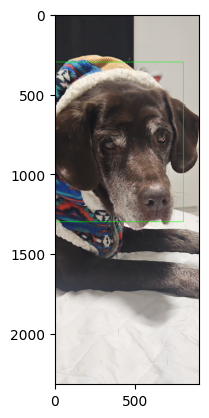

In [11]:
# Draw the rectangle on the image (BGR format, color is green (0, 255, 0))
cv2.rectangle(img, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 2)
# Display the image with the bounding box
img_transform=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_transform)


Below is the Python class ImageTransformation that encapsulates This:

A method to read and display an image, printing its shape.
A method to convert bounding box coordinates to YOLO format, with an option to save the label to a .txt file.
A method to reverse the transformation from YOLO format back to pixel coordinates.
A method to compare the original coordinates with the transformed coordinates and print them.

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
class ImageTransformation:
    def __init__(self, img_path, x_start, x_end, y_start, y_end, img_class):
        self.img_path = img_path
        self.x_start = x_start
        self.x_end = x_end
        self.y_start = y_start
        self.y_end = y_end
        self.img_class = img_class
        self.img = cv2.imread(img_path)
        self.height, self.width, _ = self.img.shape
        
    # Function 1: Load image and display its shape and content
    def display_image(self):
        print(f"Image shape: {self.img.shape}")
        img_transform = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_transform)
        plt.axis('off')
        plt.show()

    # Function 2: Convert bounding box to YOLO format and optionally save to a text file
    def convert_to_yolo_format(self, save_to_txt=False):
        # Calculate center and size of the bounding box in pixels
        center_x = (self.x_start + self.x_end) / 2
        center_y = (self.y_start + self.y_end) / 2
        bbox_width = self.x_end - self.x_start
        bbox_height = self.y_end - self.y_start

        # Normalize the coordinates by image dimensions
        normalized_center_x = center_x / self.width
        normalized_center_y = center_y / self.height
        normalized_bbox_width = bbox_width / self.width
        normalized_bbox_height = bbox_height / self.height

        # YOLO label format
        label = f"{self.img_class} {normalized_center_x} {normalized_center_y} {normalized_bbox_width} {normalized_bbox_height}"
        print(f"YOLO format label: {label}")

        # Optionally, save the label to a .txt file
        if save_to_txt:
            label_file = f"{self.img_path.split('/')[-1].split('.')[0]}_{self.img_class}.txt"
            with open(label_file, 'w') as f:
                f.write(label)
            print(f"Label saved to {label_file}")
        
        return label

    # Function 3: Reverse the normalization and return original bounding box coordinates
    def reverse_transformation(self, normalized_values):
        class_id, normalized_center_x, normalized_center_y, normalized_bbox_width, normalized_bbox_height = map(float, normalized_values.split())
        
        # Convert back to pixel coordinates
        x_center = normalized_center_x * self.width
        y_center = normalized_center_y * self.height
        box_width = normalized_bbox_width * self.width
        box_height = normalized_bbox_height * self.height
        
        # Calculate top-left corner of the bounding box
        x_start_reversed = int(x_center - (box_width / 2))
        y_start_reversed = int(y_center - (box_height / 2))
        x_end_reversed = int(x_start_reversed + box_width)
        y_end_reversed = int(y_start_reversed + box_height)
        
        return x_start_reversed, x_end_reversed, y_start_reversed, y_end_reversed

    # Function 4: Compare original and reversed coordinates
    def compare_coordinates(self, original_coords, transformed_coords):
        print("Original Coordinates:")
        print(f"x_start: {self.x_start}, x_end: {self.x_end}, y_start: {self.y_start}, y_end: {self.y_end}")
        
        print("Transformed Coordinates:")
        print(f"x_start: {transformed_coords[0]}, x_end: {transformed_coords[1]}, y_start: {transformed_coords[2]}, y_end: {transformed_coords[3]}")
        
        # Check if the coordinates match (allow for small floating point errors)
        if np.isclose([self.x_start, self.x_end, self.y_start, self.y_end], transformed_coords).all():
            print("The transformed coordinates match the original coordinates.")
        else:
            print("The transformed coordinates do NOT match the original coordinates.")
        
    # Function to draw the bounding box on the image (BGR format)
    def draw_bounding_box(self, x_start, y_start, x_end, y_end):
        cv2.rectangle(self.img, (x_start, y_start), (x_end, y_end), (0, 255, 0), 2)
        img_transform = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_transform)
        plt.axis('off')
        plt.show()


# Example usage:



Image shape: (2316, 904, 3)


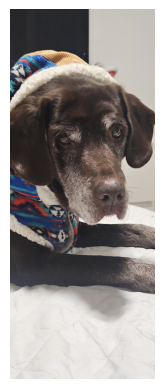

YOLO format label: 0 0.4424778761061947 0.3454231433506045 0.8849557522123894 0.4317789291882556
Label saved to Screenshot_20250127_114519_Gallery_0.txt
Reversed Coordinates: (0, 800, 300, 1300)
Original Coordinates:
x_start: 0, x_end: 800, y_start: 300, y_end: 1300
Transformed Coordinates:
x_start: 0, x_end: 800, y_start: 300, y_end: 1300
The transformed coordinates match the original coordinates.


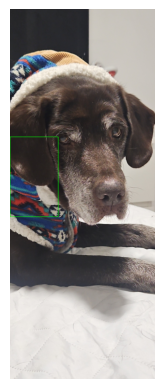

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ImageTransformation:
    def __init__(self, img_path, x_start, x_end, y_start, y_end, img_class):
        self.img_path = img_path
        self.x_start = x_start
        self.x_end = x_end
        self.y_start = y_start
        self.y_end = y_end
        self.img_class = img_class
        self.img = cv2.imread(img_path)
        self.height, self.width, _ = self.img.shape
        
    # Function 1: Load image and display its shape and content
    def display_image(self):
        print(f"Image shape: {self.img.shape}")
        img_transform = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_transform)
        plt.axis('off')
        plt.show()

    # Function 2: Convert bounding box to YOLO format and optionally save to a text file
    def convert_to_yolo_format(self, save_to_txt=False):
        # Calculate center and size of the bounding box in pixels
        center_x = (self.x_start + self.x_end) / 2
        center_y = (self.y_start + self.y_end) / 2
        bbox_width = self.x_end - self.x_start
        bbox_height = self.y_end - self.y_start

        # Normalize the coordinates by image dimensions
        normalized_center_x = center_x / self.width
        normalized_center_y = center_y / self.height
        normalized_bbox_width = bbox_width / self.width
        normalized_bbox_height = bbox_height / self.height

        # YOLO label format (class_id followed by normalized values)
        label = f"{self.img_class} {normalized_center_x} {normalized_center_y} {normalized_bbox_width} {normalized_bbox_height}"
        print(f"YOLO format label: {label}")

        # Optionally, save the label to a .txt file
        if save_to_txt:
            label_file = f"{self.img_path.split('/')[-1].split('.')[0]}_{self.img_class}.txt"
            with open(label_file, 'w') as f:
                f.write(label)
            print(f"Label saved to {label_file}")
        
        return label

    # Function 3: Reverse the normalization and return original bounding box coordinates
    def reverse_transformation(self, normalized_values):
        # Expect normalized values as a list of floats directly
        class_id, normalized_center_x, normalized_center_y, normalized_bbox_width, normalized_bbox_height = normalized_values
        
        # Convert back to pixel coordinates
        x_center = normalized_center_x * self.width
        y_center = normalized_center_y * self.height
        box_width = normalized_bbox_width * self.width
        box_height = normalized_bbox_height * self.height
        
        # Calculate top-left corner of the bounding box
        x_start_reversed = int(x_center - (box_width / 2))
        y_start_reversed = int(y_center - (box_height / 2))
        x_end_reversed = int(x_start_reversed + box_width)
        y_end_reversed = int(y_start_reversed + box_height)
        
        return x_start_reversed, x_end_reversed, y_start_reversed, y_end_reversed

    # Function 4: Compare original and reversed coordinates
    def compare_coordinates(self, original_coords, transformed_coords):
        print("Original Coordinates:")
        print(f"x_start: {self.x_start}, x_end: {self.x_end}, y_start: {self.y_start}, y_end: {self.y_end}")
        
        print("Transformed Coordinates:")
        print(f"x_start: {transformed_coords[0]}, x_end: {transformed_coords[1]}, y_start: {transformed_coords[2]}, y_end: {transformed_coords[3]}")
        
        # Check if the coordinates match (allow for small floating point errors)
        if np.isclose([self.x_start, self.x_end, self.y_start, self.y_end], transformed_coords).all():
            print("The transformed coordinates match the original coordinates.")
        else:
            print("The transformed coordinates do NOT match the original coordinates.")
        
    # Function to draw the bounding box on the image (BGR format)
    def draw_bounding_box(self, x_start, y_start, x_end, y_end):
        cv2.rectangle(self.img, (x_start, y_start), (x_end, y_end), (0, 255, 0), 2)
        img_transform = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_transform)
        plt.axis('off')
        plt.show()


# Example usage:

# Initialize the ImageTransformation class with a sample image and bounding box
img_path = 'shanti/Screenshot_20250127_114519_Gallery.jpg'
x_start = 0
x_end = 800
y_start = 300
y_end = 1300
img_class = 0  # Class ID for the object

img_transform = ImageTransformation(img_path, x_start, x_end, y_start, y_end, img_class)

# Function 1: Display the image and its shape
img_transform.display_image()

# Function 2: Convert the bounding box to YOLO format and print
yolo_label = img_transform.convert_to_yolo_format(save_to_txt=True)

# Function 3: Reverse the transformation and get the original bounding box coordinates
# Now pass the normalized values (including class_id) directly as a list of floats
normalized_values = list(map(float, yolo_label.split(" ")))  # Convert the entire string to a list of floats
reversed_coords = img_transform.reverse_transformation(normalized_values)
print("Reversed Coordinates:", reversed_coords)

# Function 4: Compare original and reversed coordinates
img_transform.compare_coordinates((x_start, x_end, y_start, y_end), reversed_coords)

# Draw the bounding box on the image
img_transform.draw_bounding_box(*reversed_coords)

